In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [90]:
heart_data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
saturation_data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
heart_data.head(5)




,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


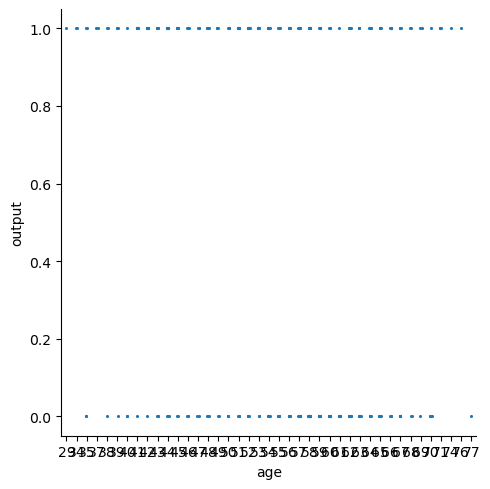

In [84]:
sns.catplot(x = 'age', y = 'output', data = heart_data, s = 5)
heart_data.head(5)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
score = 0
def fit_model():
    global score
    multi_X = ['trtbps', 'chol','fbs','restecg', 'thalachh', 'exng', 'oldpeak','slp','caa','thall']
    y = 'output'

    multi_train_df, multi_test_df = train_test_split(heart_data, test_size = 0.2, random_state = None)

    multi_X_train, multi_X_test = multi_train_df[multi_X], multi_test_df[multi_X]
    y_train, y_test = multi_train_df[y], multi_test_df[y]

    model = LogisticRegression(random_state = None, max_iter=1000)

    model.fit(multi_X_train, y_train)

    multi_preds = model.predict(multi_X_test)

    accuracy = accuracy_score(y_test, multi_preds)
    print(multi_X)
    print(accuracy)
    score += accuracy

for i in range (10):
    fit_model()
score/=10
print('Average accuacy: ', score*100,'%')
    
    




['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.7704918032786885
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.819672131147541
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.8360655737704918
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.7868852459016393
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.819672131147541
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.7868852459016393
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.7540983606557377
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.8360655737704918
['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.7704918032786885
['trtbps', '

In [99]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(multi_X_train, y_train)
predict = knn.predict(multi_X_test)
accuracy_score(y_test, multi_preds)
print(multi_X)
print(accuracy)

['trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
0.7049180327868853
